In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [5]:
df = pd.read_csv('dec19_400k_rs1_edt_fillna.csv')

In [9]:
T0 = df[df['Severity'] < 3].Temperature_filled_mean

62.651764872609526

18.50867658848927

In [109]:
print("Severity_less_than_3 count:",T0.count()," | ", "Severity_3_and_above count:",T1.count())


Severity_less_than_3 count: 268324  |  Severity_3_and_above count: 131676


### Hypothesis testing
Three features were picked for hypothesis testing. <br>
**Null Hypothesis:** Preciptation / Temperature /Humidity have no impact on severity of road accidents.<br>
**Alternate hypothesis:** Precipitation / Temperature /humidity have an observable effect on severity of road accidents.<br>

#### Split data into two samples: 
High severity: Severity 1 & 2, [P0 / T0 / H0] (count: 268324) and <br>
Low severity : Severity 3 & 4 [P1 / T1 /H1] (count: 131676)

#### Results:
**Precipitation**: <br>
Difference in mean of P0 and P1 = -0.00217 <br>
Reject the null hypothesis since p-value is zero. Precipitation has an impact on road accident severity. <br>
Since lower severities have lower mean precipitation, this implies that higher precipitation leads to more severe road accidents.<br>

**Temperature**: <br>
Number of samples T0 / T1: 268324 / 131676.
Reject the null hypothesis since p-value is zero Temperature does have an effect on accident severity. since T0 - T1 is positive(0.863), this implies the mean temperatures of severities 1 and 2 are *higer* than mean temperatures of severities 3 and 4. We can conclude that *lower* temperatures result in more severe accidents.<br>

**Humidity**:<br>
Reject the null hypothesis.<br>
*Higher* precipitation results in more severe accidents. The mean difference in humidity between the two groups is about 0.9%.

### Observation:
Difference in the mean between the low severity and high severity groups is very small: 0.002inches for Precipitation, less than a degree F for Temperature, and less than 1% for Humidity.


In [ ]:
stats.ttest_ind

In [38]:
df_severity_under3 = df[df['Severity'] < 3]

In [39]:
df_severity_over3 = df[df['Severity'] >= 3]

In [48]:
P1 = df_severity_over3.Precipitation_filled
P0 = df_severity_under3.Precipitation_filled

In [82]:
T1 = df_severity_over3.Temperature_filled_mean
T0 = df_severity_under3.Temperature_filled_mean

In [94]:
H1 = df_severity_over3.Humidity_filled_mean
H0 = df_severity_under3.Humidity_filled_mean

In [89]:
def calc_n_mean_std(series):
    """ calculate count, mean and standard deviation of input series"""
    series_mean = round(np.mean(series), 5)
    series_std = round(np.std(series), 3)
    series_n = series.count()
    return series_n, series_mean, series_std

In [90]:
p1 = calc_n_mean_std(P1)
p0 = calc_n_mean_std(P0)

pd.DataFrame({'count, mean, std':(p0, p1)})

,"count, mean, std"
0,"(268324, 0.00576, 0.122)"
1,"(131676, 0.00793, 0.136)"


In [92]:
p0_p1_mean_diff = p0[1] - p1[1]
p0_p1_mean_diff

-0.002169999999999999

In [ ]:
# calculating t-statistic and p-value using scipy.stats:

tr = stats.ttest_ind(P0, P1, equal_var=False) # equal variance assumption
print("p-value, ", tr[1], "is very small. Reject Null hypothesis.")
print("'P1' has bigger effect on severity, since,", round(tr[0], 3), "is a -ve number")

In [83]:
t1 = calc_n_mean_std(T1)
t0 = calc_n_mean_std(T0)

pd.DataFrame({'count, mean, std':(t0, t1)})

,"count, mean, std"
0,"(268324, 62.65176, 18.509)"
1,"(131676, 61.78809, 18.78)"


In [85]:
# calculating t-statistic and p-value using scipy.stats:

tr_t = stats.ttest_ind(T0, T1, equal_var=False) # equal variance assumption
print("p-value, ", tr_t[1], "is very small. Reject Null hypothesis.")
print("'T0' has bigger effect on severity, since,", round(tr_t[0], 3), "is a +ve number")

p-value,  6.642916347297958e-43 is very small. Reject Null hypothesis.
'T0' has bigger effect on severity, since, 13.733 is a +ve number


In [95]:
t0_t1_mean_diff = t0[1] - t1[1]
t0_t1_mean_diff

0.8636700000000062

In [96]:
h1 = calc_n_mean_std(H1)
h0 = calc_n_mean_std(H0)

pd.DataFrame({'count, mean, std':(h0, h1)})

,"count, mean, std"
0,"(268324, 65.10025, 22.556)"
1,"(131676, 66.00628, 21.917)"


In [98]:
# calculating t-statistic and p-value using scipy.stats:

tr_h = stats.ttest_ind(H0, H1, equal_var=False) # equal variance assumption
print("p-value, ", tr_h[1], "is very small. Reject Null hypothesis.")
print("'H1' has bigger effect on severity, since,", round(tr_h[0], 3), "is a -ve number")

p-value,  4.688265062255147e-34 is very small. Reject Null hypothesis.
'H1' has bigger effect on severity, since, -12.168 is a -ve number


In [99]:
h0_h1_mean_diff = h0[1] - h1[1]
h0_h1_mean_diff

-0.9060300000000012

In [3]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Precipitation(in),Day_of_Week,Hour_of_Day,Precipitation_filled,Wind_Speed_filled_mean,Wind_Speed_filled_median,Humidity_filled_mean,Temperature_filled_median,Temperature_filled_mean,Wind_Chill_predicted_filled
count,400000.000000,400000.000000,4.000000e+05,301701.000000,400000.000000,400000.000000,400000.000000,98299.000000,98299.000000,400000.000000,...,131252.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,199999.500000,199999.500000,1.490152e+06,207.841485,2.360142,36.493190,-95.418894,37.599169,-99.986740,0.287561,...,0.019732,2.384245,12.105915,0.006475,8.305884,8.113276,65.398506,62.405851,62.367451,60.481534
std,115470.198175,115470.198175,8.582070e+05,20.295358,0.541752,4.919935,17.210788,5.002061,18.415574,1.587642,...,0.220855,1.713651,5.096637,0.126850,4.500350,4.524111,22.351643,18.604781,18.602723,21.379503
min,0.000000,0.000000,1.200000e+01,200.000000,1.000000,24.570442,-124.497523,24.571534,-124.497442,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-77.800000,-77.800000,-105.272215
25%,99999.750000,99999.750000,7.474690e+05,201.000000,2.000000,33.552807,-117.291287,33.959787,-118.286333,0.000000,...,0.000000,1.000000,8.000000,0.000000,5.800000,5.800000,49.000000,51.000000,51.000000,47.782983
50%,199999.500000,199999.500000,1.491116e+06,201.000000,2.000000,35.844623,-90.288139,37.929230,-96.628680,0.000000,...,0.000000,2.000000,12.000000,0.000000,8.100000,7.000000,67.000000,64.400000,64.000000,63.000000
75%,299999.250000,299999.250000,2.234019e+06,201.000000,3.000000,40.367809,-80.918633,41.380871,-82.343977,0.010000,...,0.000000,4.000000,16.000000,0.000000,10.400000,10.400000,84.000000,75.900000,75.900000,76.100450
max,399999.000000,399999.000000,2.974329e+06,406.000000,4.000000,49.000580,-67.606875,49.075000,-67.626605,333.630005,...,10.180000,6.000000,23.000000,10.180000,230.000000,230.000000,100.000000,168.800000,168.800000,180.315281


In [15]:
alpha = 0.05
critical_value = stats.t.ppf(1.0 - alpha, 399999)
critical_value

#  

1.6448574363927408

In [18]:
test_statistic = np.mean(df.Temperature_filled_mean) / (np.std(df.Temperature_filled_mean) \
                                                    * np.sqrt(len(df.Temperature_filled_mean)))
test_statistic

0.0053009293627147985

In [33]:
# ecdf function

def ecdf(data):
    """compute ECDF for a one-dimentional array of measurements"""
    # Number of data points:n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [46]:
# extract Series from Panda Dataframe
temp = df['Temperature_filled_median']
humi = df['Humidity_filled_mean']
sev = df['Severity']

In [47]:
#Convert Series to 1D numpy array
temp.to_numpy()
humi.to_numpy()
sev.to_numpy()

array([2, 3, 2, ..., 2, 3, 2], dtype=int64)

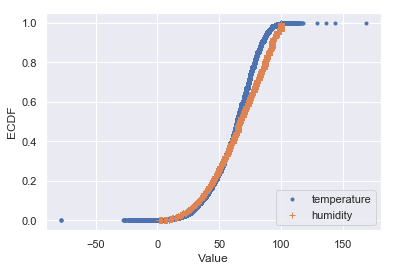

In [49]:
# Plot ECDF
#sns.set(style="darkgrid")

x_temp, y_temp = ecdf(temp)
x_humi, y_humi = ecdf(humi)

_ = plt.plot(x_temp, y_temp, marker = '.', linestyle='none')
_ = plt.plot(x_humi, y_humi, marker = '+', linestyle = 'none')

plt.legend(('temperature', 'humidity'), loc='lower right')

_ = plt.xlabel('Value')
_ = plt.ylabel('ECDF')

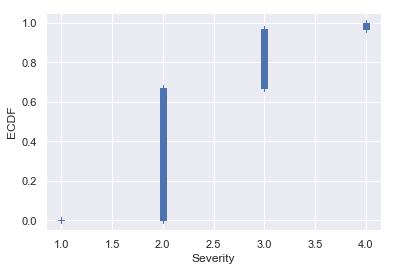

In [44]:
x_sev, y_sev = ecdf(sev)
_ = plt.plot(x_sev, y_sev, marker = '+', linestyle = 'none')
_ = plt.xlabel('Severity')
_ = plt.ylabel('ECDF')
plt.show()

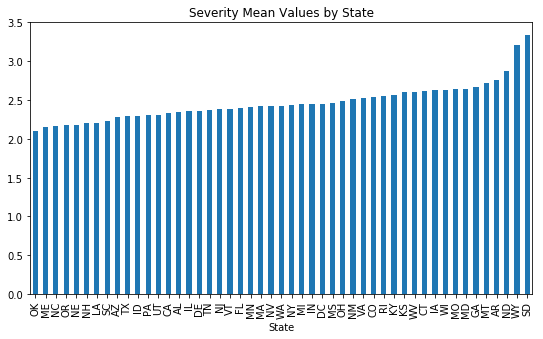

In [9]:
# Severity mean values by State
df.groupby('State')['Severity'].mean().sort_values().plot(kind='bar', figsize=(9,5), \
title="Severity Mean Values by State");

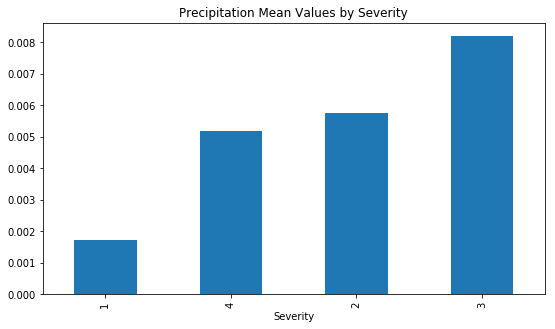

In [19]:
# Precipitation mean values by Severity
df.groupby('Severity')['Precipitation_filled'].mean().sort_values().plot(kind='bar', figsize=(9,5), \
title="Precipitation Mean Values by Severity");

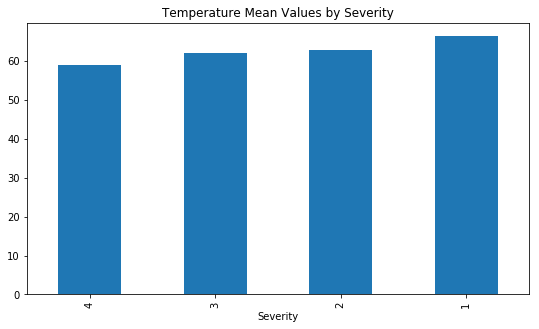

In [27]:
# Temperature mean values by Severity
df.groupby('Severity')['Temperature_filled_median'].mean().sort_values().plot(kind='bar', figsize=(9,5), \
title="Temperature Mean Values by Severity");

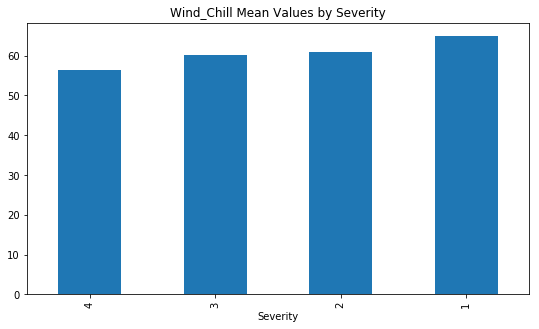

In [23]:
# Wind_Chill mean values by Severity
df.groupby('Severity')['Wind_Chill_predicted_filled'].mean().sort_values().plot(kind='bar', figsize=(9,5), \
title="Wind_Chill Mean Values by Severity");

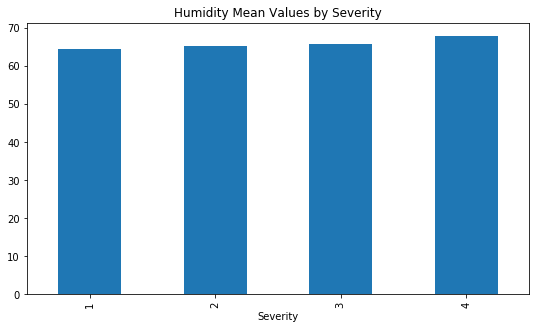

In [24]:
# Humidity mean values by Severity
df.groupby('Severity')['Humidity_filled_mean'].mean().sort_values().plot(kind='bar', figsize=(9,5), \
title="Humidity Mean Values by Severity");

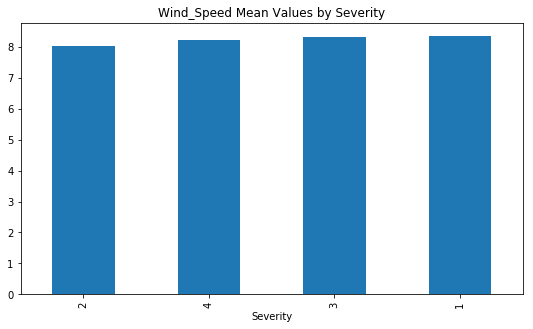

In [26]:
# Wind_Speed mean values by Severity
df.groupby('Severity')['Wind_Speed_filled_median'].mean().sort_values().plot(kind='bar', figsize=(9,5), \
title="Wind_Speed Mean Values by Severity");